In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_edited = pd.read_csv('./data/clean_df_final.csv', index_col=0 )

F:\Anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (7,8,29) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Reset Display or Max Display setting here

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

#TO SEE EVERYTHING

In [4]:
pd.reset_option('all')
#RUN THIS WHEN DONE SEEING EVERYTHING PLS


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



F:\Anaconda\envs\learn-env\lib\site-packages\pandas\_config\config.py:622: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


# Creating new DF of only post 2010

In [5]:
df_edited2 = df_edited[df_edited['year']>2010].copy()

In [6]:
df_edited2['counter'].sum()

19514

# Fatality Cleaning

In [7]:
df_edited2['total_pop'] = (df_edited2['Total.Fatal.Injuries'] + df_edited2['Total.Minor.Injuries'] + df_edited2['Total.Serious.Injuries'] + df_edited2['Total.Uninjured'])

#Creating total_pop col

In [8]:
#GROUP BY ENGINE AND MAKE

In [9]:
sum_engine_make = df_edited2.groupby(['Make', 'Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [10]:
sum_engine_make['fatality_perc'] = (sum_engine_make['Total.Fatal.Injuries']/sum_engine_make['total_pop']) * 100
sum_engine_make['injury_perc'] = ((sum_engine_make['Total.Serious.Injuries']+sum_engine_make['Total.Minor.Injuries'])/sum_engine_make['total_pop']) * 100
sum_engine_make['uninjured_perc'] = (sum_engine_make['Total.Uninjured']/sum_engine_make['total_pop']) * 100
sum_engine_make.reset_index(inplace = True)

In [11]:
#GROUP BY MAKE

In [12]:
sum_make = df_edited2.groupby(['Make']).sum().sort_values(by='total_pop', ascending = False)

In [13]:
sum_make['fatality_perc'] = (sum_make['Total.Fatal.Injuries']/sum_make['total_pop']) * 100
sum_make['injury_perc'] = ((sum_make['Total.Serious.Injuries']+sum_make['Total.Minor.Injuries'])/sum_make['total_pop']) * 100
sum_make['uninjured_perc'] = (sum_make['Total.Uninjured']/sum_make['total_pop']) * 100
sum_make.reset_index(inplace = True)

In [14]:
#GROUP BY ENGINE NUM
sum_engine = df_edited2.groupby(['Number.of.Engines']).sum().sort_values(by='total_pop', ascending = False)

In [15]:
sum_engine['fatality_perc'] = (sum_engine['Total.Fatal.Injuries']/sum_engine['total_pop']) * 100
sum_engine['injury_perc'] = ((sum_engine['Total.Serious.Injuries']+sum_engine['Total.Minor.Injuries'])/sum_engine['total_pop']) * 100
sum_engine['uninjured_perc'] = (sum_engine['Total.Uninjured']/sum_engine['total_pop']) * 100
sum_engine.reset_index(inplace = True)

# Fatality Analyzing

In [16]:
new_sum_engine = sum_engine[sum_engine['counter'] >= 75]
new_sum_engine

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
1,-99.0,4873.0,960.0,717.0,45604.0,6546690,3245,52154.0,9.343483,3.215477,87.441040
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336


In [17]:
new_sum_engine.drop([1], axis = 0, inplace = True)

F:\Anaconda\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [18]:
new_sum_engine.sort_values(by = 'uninjured_perc', ascending = False)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
0,2.0,1466.0,916.0,499.0,54786.0,4239798,2103,57667.0,2.542182,2.453743,95.004075
4,0.0,38.0,66.0,79.0,341.0,423324,210,524.0,7.251908,27.671756,65.076336
2,1.0,4328.0,3657.0,2443.0,13784.0,27996212,13886,24212.0,17.875434,25.194119,56.930448


In [19]:
##CONCLUSION: 3 4 and 2 are safest
## 0 and 1 are not safest

In [20]:
new_sum_engine_make = sum_engine_make[sum_engine_make['counter'] >= 75]

In [21]:
new_sum_engine_make = new_sum_engine_make[new_sum_engine_make['Number.of.Engines']!= -99]

In [22]:
new_sum_engine_make.sort_values(by = 'uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
45,Maule,1.0,11.0,25.0,7.0,133.0,233875,116,176.0,6.250000,18.181818,75.568182
47,Stinson,1.0,4.0,39.0,13.0,110.0,191559,95,166.0,2.409639,31.325301,66.265060
3,Cessna,1.0,976.0,973.0,528.0,4621.0,7621290,3780,7098.0,13.750352,21.146802,65.102846
39,Champion,1.0,29.0,31.0,18.0,135.0,278306,138,213.0,13.615023,23.004695,63.380282
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
41,Bellanca,1.0,29.0,23.0,23.0,123.0,272076,135,198.0,14.646465,23.232323,62.121212
51,Diamond,1.0,19.0,20.0,15.0,83.0,165350,82,137.0,13.868613,25.547445,60.583942
43,Aeronca,1.0,23.0,32.0,20.0,112.0,258108,128,187.0,12.299465,27.807487,59.893048


In [23]:
new_sum_engine_make[new_sum_engine_make['Number.of.Engines'] == 2].sort_values(by = 'uninjured_perc', ascending = False)

#deeper look at 2 engines

,Make,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
2,Airbus,2.0,2.0,106.0,30.0,12064.0,256169,127,12202.0,0.016391,1.114571,98.869038
1,Boeing,2.0,148.0,432.0,153.0,31590.0,645080,320,32323.0,0.457878,1.809857,97.732265
18,Beech,2.0,217.0,74.0,55.0,595.0,653143,324,941.0,23.060574,13.708820,63.230606
16,Cessna,2.0,276.0,80.0,57.0,586.0,739961,367,999.0,27.627628,13.713714,58.658659
20,Piper,2.0,256.0,57.0,49.0,409.0,628988,312,771.0,33.203632,13.748379,53.047990


# Deeper analyzing into 2 engine Airbus and Boeing (maybe cut)

In [24]:
airbus_boeing_2eng = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type']).sum()

In [25]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['counter'] >= 75]

In [26]:
airbus_boeing_2eng['fatality_perc'] = (airbus_boeing_2eng['Total.Fatal.Injuries']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['injury_perc'] = ((airbus_boeing_2eng['Total.Serious.Injuries']+airbus_boeing_2eng['Total.Minor.Injuries'])/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng['uninjured_perc'] = (airbus_boeing_2eng['Total.Uninjured']/airbus_boeing_2eng['total_pop']) * 100
airbus_boeing_2eng.reset_index(inplace = True)

In [27]:
airbus_boeing_2eng = airbus_boeing_2eng[airbus_boeing_2eng['Number.of.Engines']!=-99]

In [28]:
airbus_boeing_2eng.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
15,Boeing,2.0,Unknown,134.0,44.0,34.0,10534.0,266253,132,10746.0,1.246976,0.725851,98.027173
14,Boeing,2.0,Turbo Fan,7.0,382.0,115.0,19611.0,358711,178,20115.0,0.034800,2.470793,97.494407
26,Maule,1.0,Reciprocating,9.0,22.0,5.0,116.0,203567,101,152.0,5.921053,17.763158,76.315789
9,Beech,2.0,Turbo Prop,70.0,18.0,21.0,290.0,213616,106,399.0,17.543860,9.774436,72.681704
17,Cessna,1.0,Reciprocating,711.0,825.0,396.0,3982.0,6571033,3260,5914.0,12.022320,20.645925,67.331755
35,Stinson,1.0,Reciprocating,4.0,35.0,12.0,98.0,175390,87,149.0,2.684564,31.543624,65.771812
18,Cessna,1.0,Turbo Prop,58.0,39.0,27.0,236.0,167321,83,360.0,16.111111,18.333333,65.555556
21,Champion,1.0,Reciprocating,23.0,29.0,17.0,125.0,252027,125,194.0,11.855670,23.711340,64.432990
0,Aeronca,1.0,Reciprocating,16.0,24.0,17.0,96.0,213642,106,153.0,10.457516,26.797386,62.745098


In [29]:
airbus_boeing_2eng[airbus_boeing_2eng['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Grouping by Make, Engine Num, Engine Type, and Purpose

In [30]:
df_edited2['Purpose.of.flight'] = df_edited2['Purpose.of.flight'].fillna('Unknown')

In [31]:
purpose_df = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type', 'Purpose.of.flight']).sum()

In [32]:
purpose_df = purpose_df[purpose_df['counter'] >= 75]

In [33]:
purpose_df['fatality_perc'] = (purpose_df['Total.Fatal.Injuries']/purpose_df['total_pop']) * 100
purpose_df['injury_perc'] = ((purpose_df['Total.Serious.Injuries']+purpose_df['Total.Minor.Injuries'])/purpose_df['total_pop']) * 100
purpose_df['uninjured_perc'] = (purpose_df['Total.Uninjured']/purpose_df['total_pop']) * 100
purpose_df.reset_index(inplace = True)

In [34]:
purpose_df = purpose_df[purpose_df['Number.of.Engines']!=-99]

In [35]:
purpose_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.022230,1.200400,98.777370
13,Boeing,2.0,Unknown,Unknown,134.0,44.0,34.0,10528.0,260211,129,10740.0,1.247672,0.726257,98.026071
12,Boeing,2.0,Turbo Fan,Unknown,7.0,382.0,114.0,19421.0,354680,176,19924.0,0.035134,2.489460,97.475407
23,Maule,1.0,Reciprocating,Personal,8.0,17.0,4.0,109.0,185438,92,138.0,5.797101,15.217391,78.985507
15,Cessna,1.0,Reciprocating,Instructional,59.0,135.0,46.0,889.0,1419195,704,1129.0,5.225864,16.031887,78.742250
26,Piper,1.0,Reciprocating,Instructional,49.0,66.0,34.0,431.0,639101,317,580.0,8.448276,17.241379,74.310345
31,Robinson,1.0,Reciprocating,Instructional,11.0,41.0,8.0,161.0,241853,120,221.0,4.977376,22.171946,72.850679
16,Cessna,1.0,Reciprocating,Personal,463.0,517.0,252.0,2527.0,4228817,2098,3759.0,12.317106,20.457569,67.225326
21,Champion,1.0,Reciprocating,Personal,14.0,26.0,14.0,105.0,209691,104,159.0,8.805031,25.157233,66.037736
33,Stinson,1.0,Reciprocating,Personal,4.0,30.0,11.0,84.0,153212,76,129.0,3.100775,31.782946,65.116279


In [36]:
purpose_df[purpose_df['Make']=='Airbus']

,Make,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
3,Airbus,2.0,Turbo Fan,Unknown,2.0,86.0,22.0,8887.0,151188,75,8997.0,0.02223,1.2004,98.77737


# Grouping by Make, number of eng, eng type, and model

In [37]:
model_df = df_edited2.groupby(['Make','Number.of.Engines','Engine.Type', 'Model']).sum()

In [38]:
model_df = model_df[model_df['counter'] >= 32]

In [39]:
model_df['fatality_perc'] = (model_df['Total.Fatal.Injuries']/model_df['total_pop']) * 100
model_df['injury_perc'] = ((model_df['Total.Serious.Injuries']+model_df['Total.Minor.Injuries'])/model_df['total_pop']) * 100
model_df['uninjured_perc'] = (model_df['Total.Uninjured']/model_df['total_pop']) * 100
model_df.reset_index(inplace = True)

In [40]:
model_df = model_df[model_df['Number.of.Engines']!=-99]

In [41]:
model_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Number.of.Engines,Engine.Type,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
11,Boeing,2.0,Unknown,737,134.0,4.0,8.0,4204.0,100813,50,4350.0,3.080460,0.275862,96.643678
32,Cessna,1.0,Reciprocating,A185,2.0,5.0,3.0,89.0,108967,54,99.0,2.020202,8.080808,89.898990
43,Piper,1.0,Reciprocating,PA 12,2.0,3.0,2.0,51.0,74646,37,58.0,3.448276,8.620690,87.931034
33,Cessna,1.0,Reciprocating,A185F,10.0,4.0,0.0,91.0,100739,50,105.0,9.523810,3.809524,86.666667
28,Cessna,1.0,Reciprocating,180,11.0,18.0,8.0,205.0,272245,135,242.0,4.545455,10.743802,84.710744
24,Cessna,1.0,Reciprocating,172P,4.0,16.0,10.0,130.0,124872,62,160.0,2.500000,16.250000,81.250000
49,Piper,1.0,Reciprocating,PA18,4.0,15.0,4.0,91.0,163467,81,114.0,3.508772,16.666667,79.824561
20,Cessna,1.0,Reciprocating,170B,8.0,9.0,3.0,78.0,106776,53,98.0,8.163265,12.244898,79.591837
19,Cessna,1.0,Reciprocating,170,6.0,10.0,8.0,87.0,123066,61,111.0,5.405405,16.216216,78.378378
45,Piper,1.0,Reciprocating,PA-18-150,6.0,19.0,3.0,87.0,163165,81,115.0,5.217391,19.130435,75.652174


# Group by Make,  model, purpose

In [42]:
new_df = df_edited2.groupby(['Make', 'Model', 'Purpose.of.flight']).sum()

In [43]:
new_df = new_df[new_df['counter'] >= 32]

In [44]:
new_df['fatality_perc'] = (new_df['Total.Fatal.Injuries']/new_df['total_pop']) * 100
new_df['injury_perc'] = ((new_df['Total.Serious.Injuries']+new_df['Total.Minor.Injuries'])/new_df['total_pop']) * 100
new_df['uninjured_perc'] = (new_df['Total.Uninjured']/new_df['total_pop']) * 100
new_df.reset_index(inplace = True)

In [45]:
new_df.drop(['Number.of.Engines'], axis = 1, inplace = True)

In [46]:
new_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
8,Boeing,757,Unknown,0.0,5.0,3.0,3076.0,70597,35,3084.0,0.000000,0.259403,99.740597
7,Boeing,747,Unknown,6.0,0.0,0.0,1195.0,92750,46,1201.0,0.499584,0.000000,99.500416
10,Boeing,777,Unknown,0.0,24.0,15.0,7176.0,149243,74,7215.0,0.000000,0.540541,99.459459
9,Boeing,767,Unknown,3.0,57.0,15.0,3763.0,88719,44,3838.0,0.078166,1.875977,98.045857
6,Boeing,737,Unknown,1027.0,278.0,57.0,21106.0,837218,415,22468.0,4.570945,1.491009,93.938045
1,Airbus,A320,Unknown,163.0,6.0,8.0,2536.0,147341,73,2713.0,6.008109,0.516034,93.475857
25,Cessna,172P,Instructional,2.0,3.0,2.0,47.0,70558,35,54.0,3.703704,9.259259,87.037037
37,Cessna,A185F,Personal,10.0,5.0,0.0,81.0,96753,48,96.0,10.416667,5.208333,84.375000
29,Cessna,180,Personal,11.0,16.0,10.0,187.0,262170,130,224.0,4.910714,11.607143,83.482143
26,Cessna,172S,Instructional,15.0,9.0,2.0,101.0,159149,79,127.0,11.811024,8.661417,79.527559


In [47]:
new_df.sort_values('fatality_perc', ascending = False).head(20)

,Make,Model,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,year,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
54,Piper,PA28,Unknown,45.0,3.0,2.0,16.0,72677,36,66.0,68.181818,7.575758,24.242424
31,Cessna,182,Unknown,57.0,7.0,12.0,8.0,86792,43,84.0,67.857143,22.619048,9.523810
59,Robinson,R22,Unknown,27.0,2.0,3.0,10.0,66608,33,42.0,64.285714,11.904762,23.809524
21,Cessna,172,Unknown,84.0,9.0,22.0,32.0,161527,80,147.0,57.142857,21.088435,21.768707
62,Robinson,R44,Unknown,110.0,24.0,34.0,49.0,199828,99,217.0,50.691244,26.728111,22.580645
4,Bell,206,Unknown,64.0,7.0,18.0,53.0,113042,56,142.0,45.070423,17.605634,37.323944
39,Cirrus,SR20,Personal,27.0,9.0,2.0,27.0,66512,33,65.0,41.538462,16.923077,41.538462
41,Cirrus,SR22,Unknown,25.0,7.0,1.0,31.0,64563,32,64.0,39.062500,12.500000,48.437500
61,Robinson,R44,Personal,38.0,18.0,15.0,45.0,118971,59,116.0,32.758621,28.448276,38.793103
34,Cessna,208B,Unknown,59.0,25.0,30.0,74.0,78586,39,188.0,31.382979,29.255319,39.361702


# Group by Make and Model (Malaysia 737 bad)

In [48]:
model_make = df_edited2.groupby(['Make', 'Model']).sum()

In [49]:
model_make = model_make[model_make['counter'] >= 16]

In [50]:
model_make['walkaway_numb'] = model_make['Total.Minor.Injuries'] + model_make['Total.Uninjured']

In [51]:
model_make['fatality_perc'] = (model_make['Total.Fatal.Injuries']/model_make['total_pop']) * 100
model_make['injury_perc'] = ((model_make['Total.Serious.Injuries']+model_make['Total.Minor.Injuries'])/model_make['total_pop']) * 100
model_make['uninjured_perc'] = (model_make['Total.Uninjured']/model_make['total_pop']) * 100
model_make.reset_index(inplace = True)

In [52]:
model_make['walkaway_perc'] = ((model_make['Total.Minor.Injuries'] + model_make['Total.Uninjured']) / model_make['total_pop'] ) * 100

In [53]:
model_make.drop(['Number.of.Engines'], axis = 1, inplace = True)

In [54]:
model_make.drop(['year'], axis = 1, inplace = True)

In [55]:
model_make.sort_values('walkaway_perc', ascending = False).head(20)

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,walkaway_numb,fatality_perc,injury_perc,uninjured_perc,walkaway_perc
40,Boeing,737-800,0.0,0.0,2.0,1514.0,21,1516.0,1516.0,0.000000,0.131926,99.868074,100.000000
42,Boeing,757,0.0,5.0,3.0,3076.0,35,3084.0,3079.0,0.000000,0.259403,99.740597,99.837873
45,Boeing,787,0.0,5.0,3.0,2357.0,26,2365.0,2360.0,0.000000,0.338266,99.661734,99.788584
44,Boeing,777,0.0,24.0,15.0,7176.0,74,7215.0,7191.0,0.000000,0.540541,99.459459,99.667360
41,Boeing,747,6.0,0.0,0.0,1195.0,46,1201.0,1195.0,0.499584,0.000000,99.500416,99.500416
14,Airbus,A330,0.0,19.0,1.0,2474.0,25,2494.0,2475.0,0.000000,0.801925,99.198075,99.238172
43,Boeing,767,3.0,57.0,15.0,3763.0,44,3838.0,3778.0,0.078166,1.875977,98.045857,98.436686
76,Cessna,180J,0.0,1.0,2.0,28.0,19,31.0,30.0,0.000000,9.677419,90.322581,96.774194
129,Embraer,ERJ190,0.0,26.0,17.0,406.0,17,449.0,423.0,0.000000,9.576837,90.423163,94.209354
38,Boeing,737,1027.0,278.0,57.0,21112.0,418,22474.0,21169.0,4.569725,1.490611,93.939664,94.193290


In [56]:
model_make.sort_values('fatality_perc', ascending = False).head(20)
#IF CRASH, 75% die in PIPER PA25

,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,walkaway_numb,fatality_perc,injury_perc,uninjured_perc,walkaway_perc
180,Piper,PA25,24.0,3.0,0.0,5.0,34,32.0,5.0,75.000000,9.375000,15.625000,15.625000
30,Beech,V35,33.0,5.0,2.0,13.0,26,53.0,15.0,62.264151,13.207547,24.528302,28.301887
97,Cessna,421C,33.0,5.0,0.0,16.0,21,54.0,16.0,61.111111,9.259259,29.629630,29.629630
197,Socata,TBM 700,34.0,6.0,5.0,14.0,20,59.0,19.0,57.627119,18.644068,23.728814,32.203390
93,Cessna,340A,20.0,0.0,1.0,14.0,16,35.0,15.0,57.142857,2.857143,40.000000,42.857143
23,Beech,58,69.0,8.0,4.0,56.0,58,137.0,60.0,50.364964,8.759124,40.875912,43.795620
10,Air Tractor,AT502,18.0,5.0,1.0,12.0,36,36.0,13.0,50.000000,16.666667,33.333333,36.111111
194,Robinson,R66,50.0,4.0,13.0,34.0,53,101.0,47.0,49.504950,16.831683,33.663366,46.534653
173,Piper,PA-32-260,29.0,5.0,6.0,24.0,23,64.0,30.0,45.312500,17.187500,37.500000,46.875000
28,Beech,C90,32.0,2.0,3.0,34.0,26,71.0,37.0,45.070423,7.042254,47.887324,52.112676


In [57]:
model_make['counter'].sum()

9216

# Make, Model, Eng Num

In [58]:
model_make2 = df_edited2.groupby(['Make', 'Model', 'Number.of.Engines']).sum()

In [59]:
model_make2 = model_make2[model_make2['counter'] >= 10]

In [60]:
model_make2['fatality_perc'] = (model_make2['Total.Fatal.Injuries']/model_make2['total_pop']) * 100
model_make2['injury_perc'] = ((model_make2['Total.Serious.Injuries']+model_make2['Total.Minor.Injuries'])/model_make2['total_pop']) * 100
model_make2['uninjured_perc'] = (model_make2['Total.Uninjured']/model_make2['total_pop']) * 100
model_make2.reset_index(inplace = True)

In [61]:
model_make2.drop(['year'], axis = 1, inplace = True)

In [62]:
model_make2.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
196,Diamond,DA 20 C1,1.0,0.0,0.0,0.0,15.0,10,15.0,0.000000,0.000000,100.000000
69,Boeing,737-800,-99.0,0.0,0.0,2.0,1514.0,20,1516.0,0.000000,0.131926,99.868074
17,Airbus,A321,2.0,0.0,0.0,2.0,1344.0,10,1346.0,0.000000,0.148588,99.851412
78,Boeing,787,-99.0,0.0,1.0,2.0,1684.0,21,1687.0,0.000000,0.177830,99.822170
73,Boeing,757,2.0,0.0,1.0,3.0,1789.0,18,1793.0,0.000000,0.223090,99.776910
77,Boeing,777,2.0,0.0,1.0,1.0,875.0,11,877.0,0.000000,0.228050,99.771950
71,Boeing,747,4.0,2.0,0.0,0.0,769.0,11,771.0,0.259403,0.000000,99.740597
72,Boeing,757,-99.0,0.0,4.0,0.0,1287.0,17,1291.0,0.000000,0.309837,99.690163
16,Airbus,A320,2.0,0.0,0.0,4.0,1161.0,32,1165.0,0.000000,0.343348,99.656652
76,Boeing,777,-99.0,0.0,23.0,14.0,6301.0,63,6338.0,0.000000,0.583780,99.416220


# Table for tableau

In [114]:
tableau_df = df_edited2.groupby(['Make', 'Model', 'Number.of.Engines']).sum()

In [115]:
tableau_df = tableau_df[tableau_df['counter'] >= 10]

In [116]:
tableau_df['fatality_perc'] = (tableau_df['Total.Fatal.Injuries']/tableau_df['total_pop']) * 100
tableau_df['injury_perc'] = ((tableau_df['Total.Serious.Injuries']+tableau_df['Total.Minor.Injuries'])/tableau_df['total_pop']) * 100
tableau_df['uninjured_perc'] = (tableau_df['Total.Uninjured']/tableau_df['total_pop']) * 100
tableau_df.reset_index(inplace = True)

In [117]:
tableau_df.drop(['year'], axis = 1, inplace = True)

In [118]:
tableau_df.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
196,Diamond,DA 20 C1,1.0,0.0,0.0,0.0,15.0,10,15.0,0.000000,0.000000,100.000000
69,Boeing,737-800,-99.0,0.0,0.0,2.0,1514.0,20,1516.0,0.000000,0.131926,99.868074
17,Airbus,A321,2.0,0.0,0.0,2.0,1344.0,10,1346.0,0.000000,0.148588,99.851412
78,Boeing,787,-99.0,0.0,1.0,2.0,1684.0,21,1687.0,0.000000,0.177830,99.822170
73,Boeing,757,2.0,0.0,1.0,3.0,1789.0,18,1793.0,0.000000,0.223090,99.776910
77,Boeing,777,2.0,0.0,1.0,1.0,875.0,11,877.0,0.000000,0.228050,99.771950
71,Boeing,747,4.0,2.0,0.0,0.0,769.0,11,771.0,0.259403,0.000000,99.740597
72,Boeing,757,-99.0,0.0,4.0,0.0,1287.0,17,1291.0,0.000000,0.309837,99.690163
16,Airbus,A320,2.0,0.0,0.0,4.0,1161.0,32,1165.0,0.000000,0.343348,99.656652
76,Boeing,777,-99.0,0.0,23.0,14.0,6301.0,63,6338.0,0.000000,0.583780,99.416220


In [119]:
tableau_df.sort_values('uninjured_perc', ascending = False, inplace = True)

In [85]:
tableau_df[tableau_df['Make'] == 'Raytheon Aircraft Company']

,Make,Model,Number.of.Engines,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,fatality_perc,injury_perc,uninjured_perc
25,Raytheon Aircraft Company,36,1.0,Personal,1.0,1.0,2.0,25.0,17,29.0,3.448276,10.344828,86.206897
39,Raytheon Aircraft Company,V35B,1.0,Personal,5.0,4.0,4.0,28.0,20,41.0,12.195122,19.512195,68.292683
28,Raytheon Aircraft Company,76,2.0,Instructional,3.0,1.0,6.0,21.0,14,31.0,9.677419,22.580645,67.741935
27,Raytheon Aircraft Company,58,2.0,Personal,14.0,4.0,1.0,35.0,25,54.0,25.925926,9.259259,64.814815
36,Raytheon Aircraft Company,G35,1.0,Personal,6.0,0.0,1.0,10.0,11,17.0,35.294118,5.882353,58.823529
24,Raytheon Aircraft Company,35,1.0,Personal,5.0,14.0,7.0,35.0,29,61.0,8.196721,34.426230,57.377049
34,Raytheon Aircraft Company,C23,1.0,Personal,9.0,7.0,2.0,23.0,24,41.0,21.951220,21.951220,56.097561
254,Raytheon Aircraft Company,A36,1.0,Personal,10.0,5.0,3.0,17.0,13,35.0,28.571429,22.857143,48.571429
38,Raytheon Aircraft Company,V35,1.0,Personal,13.0,0.0,2.0,13.0,16,28.0,46.428571,7.142857,46.428571
22,Raytheon Aircraft Company,23,1.0,Personal,1.0,8.0,3.0,10.0,11,22.0,4.545455,50.000000,45.454545


In [120]:
tableau_df.to_csv('tableau_data.csv', index=True)

In [83]:
for ind in tableau_df.index:
    if 'Champion' in tableau_df['Make'][ind]:
        tableau_df['Make'][ind] = 'Bellanca'
    elif 'Beech' in tableau_df['Make'][ind]:
        tableau_df['Make'][ind] = 'Raytheon Aircraft Company'

<ipython-input-83-6fd89cd1a02b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tableau_df['Make'][ind] = 'Raytheon Aircraft Company'


# Table for tableau 2

In [105]:
tableau_df2 = df_edited2.groupby(['Make', 'Model', 'Number.of.Engines']).sum()

In [106]:
tableau_df2 = tableau_df2[tableau_df2['counter'] >= 10]

In [107]:
tableau_df2['fatality_perc'] = (tableau_df2['Total.Fatal.Injuries']/tableau_df2['total_pop']) * 100
tableau_df2['injury_perc'] = ((tableau_df2['Total.Serious.Injuries']+tableau_df2['Total.Minor.Injuries'])/tableau_df2['total_pop']) * 100
tableau_df2['uninjured_perc'] = (tableau_df2['Total.Uninjured']/tableau_df2['total_pop']) * 100
tableau_df2.reset_index(inplace = True)

In [108]:
tableau_df2.drop(['year'], axis = 1, inplace = True)

In [109]:
tableau_df2['counter_pop'] = tableau_df2['total_pop']/tableau_df2['counter']

In [111]:
tableau_f = tableau_df2[tableau_df2['counter_pop'] > 2]

In [112]:
tableau_f.sort_values('uninjured_perc', ascending = False).head(20)

,Make,Model,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,counter,total_pop,fatality_perc,injury_perc,uninjured_perc,counter_pop
69,Boeing,737-800,-99.0,0.0,0.0,2.0,1514.0,20,1516.0,0.000000,0.131926,99.868074,75.800000
17,Airbus,A321,2.0,0.0,0.0,2.0,1344.0,10,1346.0,0.000000,0.148588,99.851412,134.600000
78,Boeing,787,-99.0,0.0,1.0,2.0,1684.0,21,1687.0,0.000000,0.177830,99.822170,80.333333
73,Boeing,757,2.0,0.0,1.0,3.0,1789.0,18,1793.0,0.000000,0.223090,99.776910,99.611111
77,Boeing,777,2.0,0.0,1.0,1.0,875.0,11,877.0,0.000000,0.228050,99.771950,79.727273
71,Boeing,747,4.0,2.0,0.0,0.0,769.0,11,771.0,0.259403,0.000000,99.740597,70.090909
72,Boeing,757,-99.0,0.0,4.0,0.0,1287.0,17,1291.0,0.000000,0.309837,99.690163,75.941176
16,Airbus,A320,2.0,0.0,0.0,4.0,1161.0,32,1165.0,0.000000,0.343348,99.656652,36.406250
76,Boeing,777,-99.0,0.0,23.0,14.0,6301.0,63,6338.0,0.000000,0.583780,99.416220,100.603175
19,Airbus,A330,2.0,0.0,10.0,0.0,1507.0,13,1517.0,0.000000,0.659196,99.340804,116.692308


In [113]:
tableau_f.to_csv('tableau_data2.csv', index=True)

In [ ]:
#unique df of [model and engine]


#if we see -99
#    need to check model with same name
#        if model with same name
#            -99 becomes other model's engine number

# Weather IMC vs VMC

In [63]:
weather_cond_val = df_edited2['Weather.Condition'].value_counts()

<BarContainer object of 3 artists>

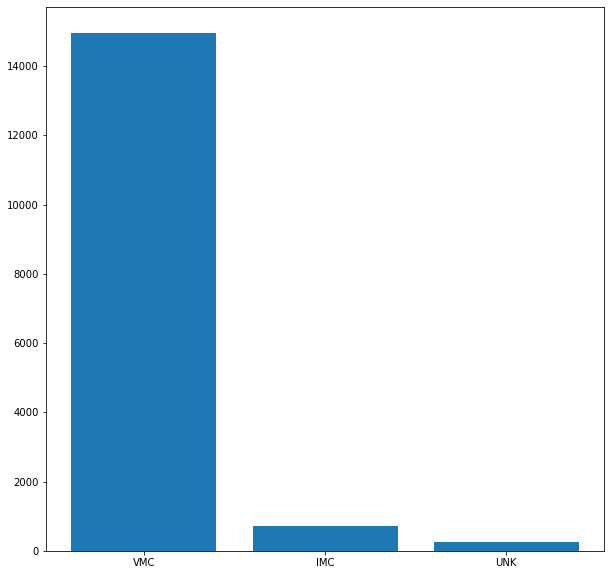

In [64]:
fig, ax = plt.subplots(figsize = (10,10))



ax.bar(x = weather_cond_val.index, height = weather_cond_val.values)



# Questions to ask

- Is cost a factor?